# **Importing The Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # seaborn is use for 'Data Visualization' like graph,scatter plot,Histogram


# **Importing The Heart Disease DataSet**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_disease_data.csv')

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1RkKdEbeav6g05o6Hh84-6FDO7-SfcvJryuUlPoy1Uh8/edit#gid=0


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
print("Number of columns:", df.shape[1])


Number of columns: 14


# **Preprocessing The Data**

In [ ]:
print(df.shape) #The .shape attribute of a pandas DataFrame returns a tuple showing the dimensions

print("Missing value checking")
print(df.isnull().sum())

(1025, 14)
Missing value checking
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
n_dup = df.duplicated().sum()
print(f"Duplicate rows: {n_dup}")

Duplicate rows: 723


In [ ]:
df[df.duplicated]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df_orig = df.copy()
df = df.drop_duplicates().reset_index(drop=True)

# Check new shape
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (302, 14)


In [ ]:
df[df.duplicated]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
print("\nSummary Statistics (Numerical):")
print(df.describe()) # That creates a quick summary of my data set.


Summary Statistics (Numerical):
             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std

# **EDA Process**

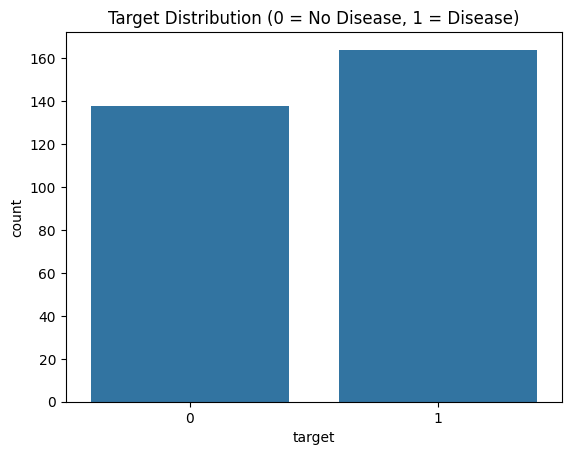

target
1    0.543046
0    0.456954
Name: proportion, dtype: float64


In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title("Target Distribution (0 = No Disease, 1 = Disease)")
plt.show()

print(df['target'].value_counts(normalize=True))

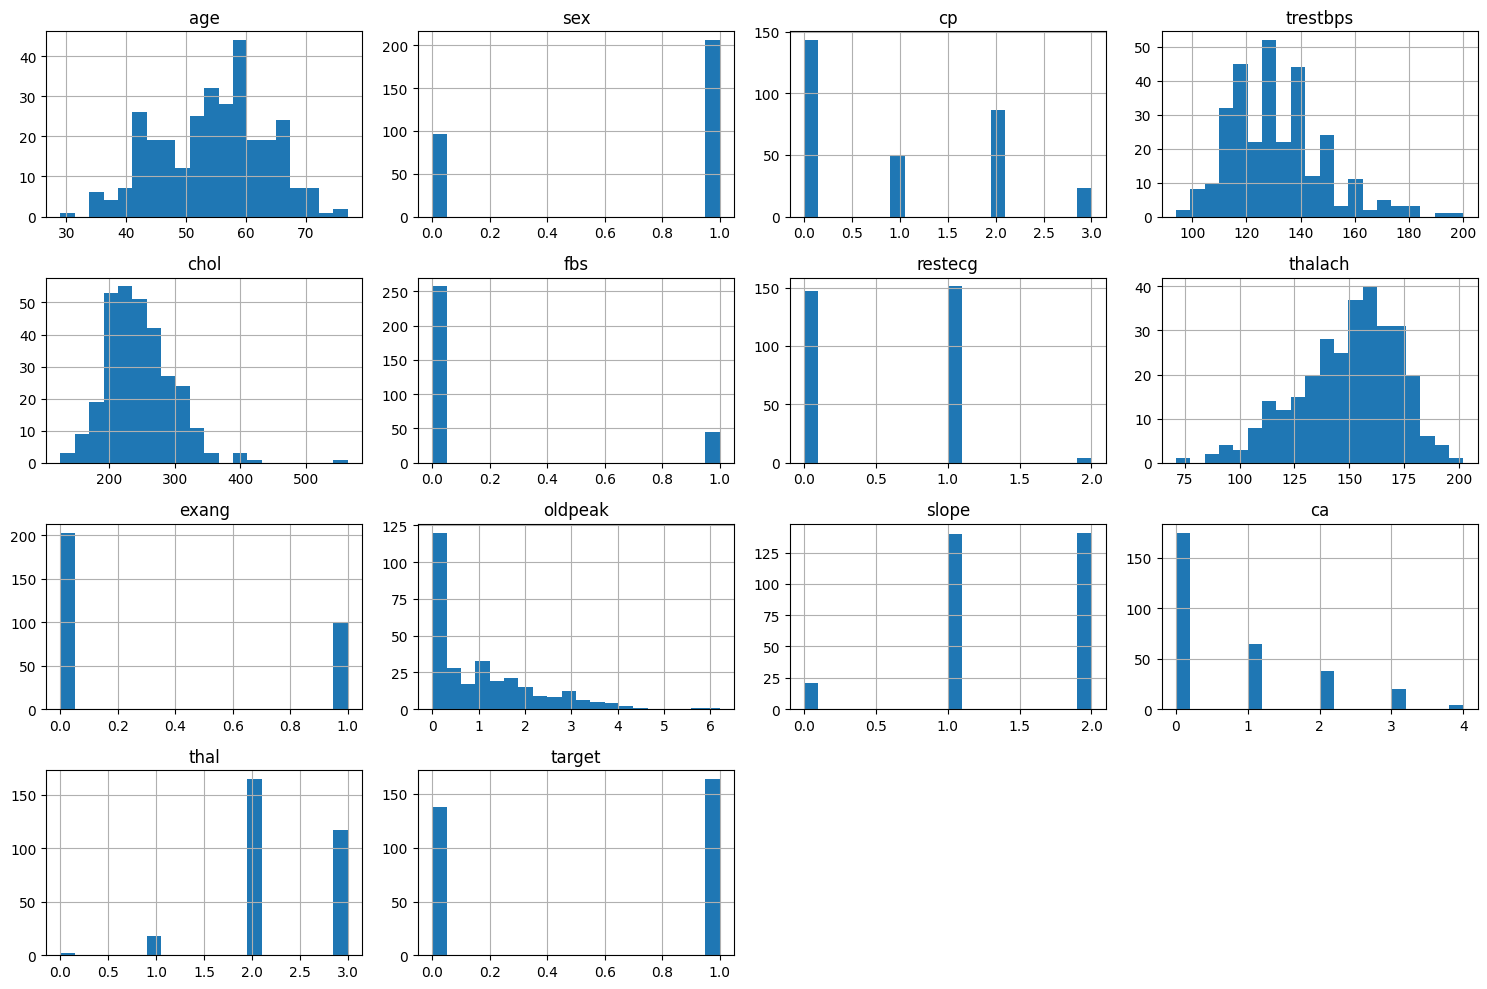

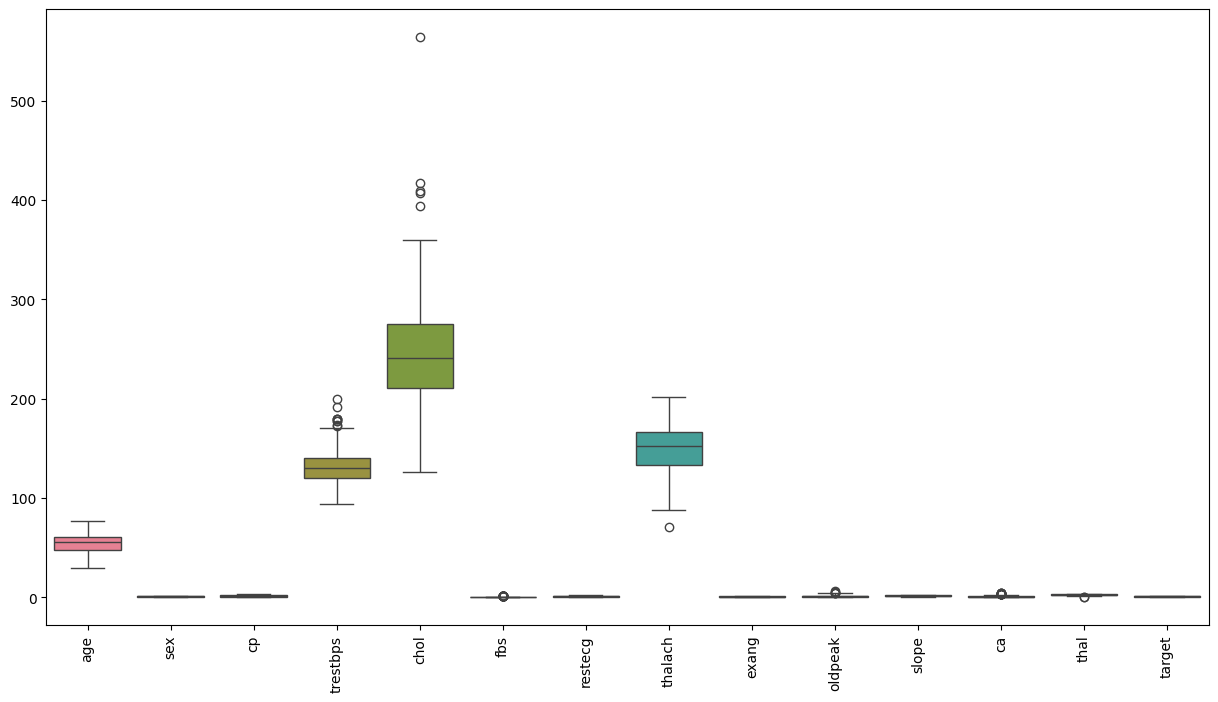

In [ ]:
df.hist(figsize=(15,10), bins=20)
plt.tight_layout()
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

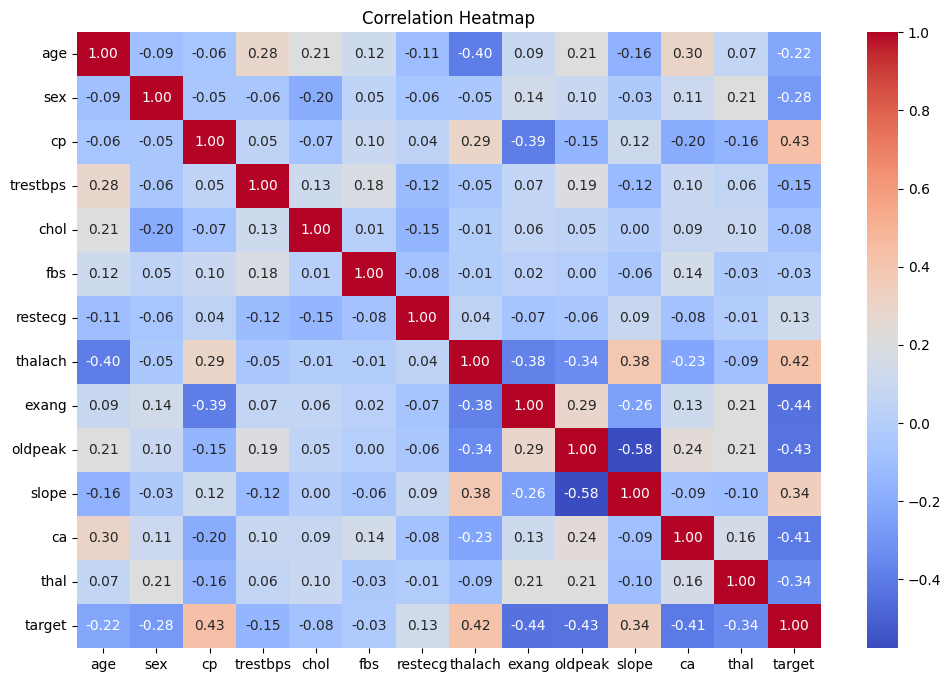

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers in each column:\n", outliers)

Outliers in each column:
 age          0
sex          0
cp           0
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          24
thal         2
target       0
dtype: int64


In [ ]:
df.shape

(302, 14)

# **Separate Features and Target**

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (302, 13)
Target shape: (302,)


# **Training & Testing**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (241, 13)
Test shape: (61, 13)


# **Different Model Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
from sklearn.preprocessing import StandardScaler

sclaer = StandardScaler()

X_train_scaled = sclaer.fit_transform(X_train)
X_test_scaled = sclaer.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.linear_model import LogisticRegression
log =  LogisticRegression()
log.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
from sklearn.svm import SVC
svc =  SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [ ]:
forest.score(X_test, y_test)

0.7868852459016393

In [ ]:
knn.score(X_test_scaled, y_test)

0.7868852459016393

In [ ]:
log.score(X_test_scaled, y_test)

0.8032786885245902

In [ ]:
svc.score(X_test_scaled, y_test)

0.7704918032786885

In [ ]:
from sklearn.metrics import recall_score

y_preds = forest.predict(X_test)
print('Forest:', recall_score(y_test, y_preds))

y_preds = knn.predict(X_test_scaled)
print('KNN:', recall_score(y_test, y_preds))

y_preds = log.predict(X_test_scaled)
print('LOG:', recall_score(y_test, y_preds))

y_preds = svc.predict(X_test_scaled)
print('SVC:', recall_score(y_test, y_preds))

Forest: 0.7878787878787878
KNN: 0.8484848484848485
LOG: 0.8484848484848485
SVC: 0.8181818181818182


# **NOTE:**
After comparing Logistic Regression, Random Forest, XGBoost, and SVC using Test Accuracy, ROC-AUC, and 5-Fold Cross-Validation, Logistic Regression was selected as the best model for heart disease prediction.A Balanced performance for both positive and negative classes with minimal misclassification. Hence, Logistic Regression provides the most reliable and interpretable results for deployment.

# Model **Choosing**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Supports both l1 and l2
}

lr = LogisticRegression(max_iter=1000, random_state=42)
lr_cv = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
lr_cv.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", lr_cv.best_params_)
print("Best CV Accuracy:", lr_cv.best_score_)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Accuracy: 0.8339285714285716


# Classification **Report**

In [ ]:
best_lr = lr_cv.best_estimator_

# Predict and evaluate
y_pred = best_lr.predict(X_test_scaled)
y_prob = best_lr.predict_proba(X_test_scaled)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.8032786885245902
Test ROC-AUC: 0.8593073593073594
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

Confusion Matrix:
 [[21  7]
 [ 5 28]]


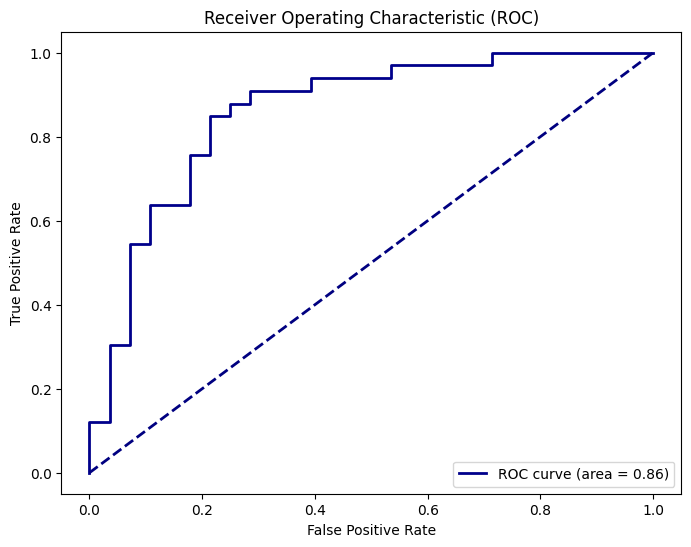

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = best_lr.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


     Feature  Coefficient
2         cp     0.599913
11        ca    -0.438591
7    thalach     0.383690
9    oldpeak    -0.346142
8      exang    -0.343139
1        sex    -0.319069
12      thal    -0.290483
10     slope     0.057245
0        age     0.000000
4       chol     0.000000
3   trestbps     0.000000
5        fbs     0.000000
6    restecg     0.000000


/tmp/ipython-input-2956935052.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')


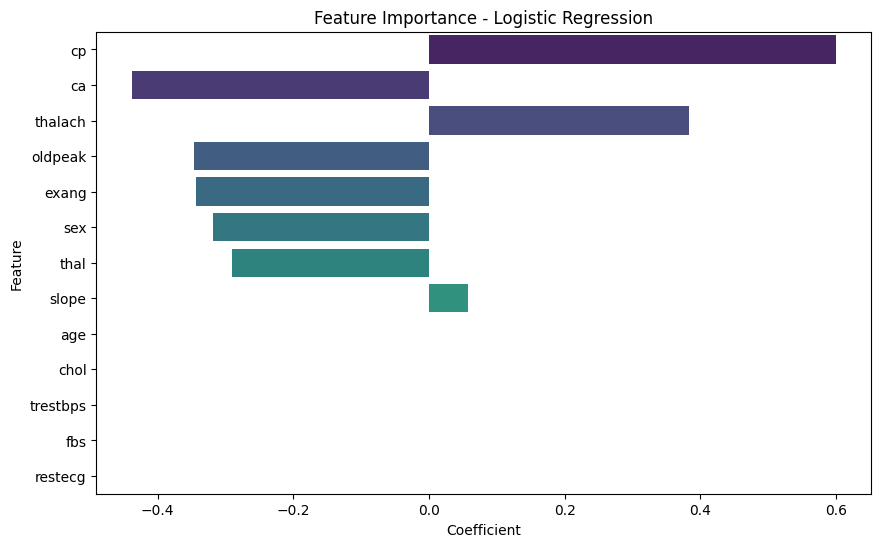

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_lr.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(feature_importance)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance - Logistic Regression')
plt.show()

# **Saving The Model**

In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler
# Save the trained Logistic Regression model
joblib.dump(best_lr, 'logistic_heart_model.pkl')

# Save the StandardScaler used for preprocessing
scaler = StandardScaler()
scaler.fit(X_train)
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully as .pkl files!")

Model and scaler saved successfully as .pkl files!


# Predecting With New Data **Value-->**

In [ ]:
import joblib
import numpy as np
import pandas as pd

# Load model and scaler
model = joblib.load('logistic_heart_model.pkl')
scaler = joblib.load('scaler.pkl')

# Define feature names (same as training)
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Collect user input
print("💓 Heart Disease Prediction System 💓\n")
user_data = []

for feature in feature_names:
    value = float(input(f"Enter {feature}: "))
    user_data.append(value)

# Create dataframe
new_patient = pd.DataFrame([user_data], columns=feature_names)

# Scale the input
new_patient_scaled = scaler.transform(new_patient)

# Predict
prediction = model.predict(new_patient_scaled)[0]
prob = model.predict_proba(new_patient_scaled)[0][1] * 100 if hasattr(model, "predict_proba") else None

# Display result
print("\n--- Prediction Result ---")
if prediction == 1:
    print("⚠️ High risk of Heart Disease")
else:
    print("✅ Low risk of Heart Disease")

if prob is not None:
    print(f"Model confidence: {prob:.2f}%")
1

💓 Heart Disease Prediction System 💓

Enter age: 32
Enter sex: 1
Enter cp: 0
Enter trestbps: 170
Enter chol: 245
Enter fbs: 0
Enter restecg: 1
Enter thalach: 150
Enter exang: 0
Enter oldpeak: 0.2
Enter slope: 1
Enter ca: 0
Enter thal: 2

--- Prediction Result ---
⚠️ High risk of Heart Disease
Model confidence: 52.30%


1